# 道路损坏数据集教程

欢迎使用道路损坏数据集教程。   
在本教程中，我们将会展示：
- 如何下载道路损坏数据集
- 数据集的结构
- 数据集的统计信息
- 如何评估你的结果

# 依赖包
在这篇教程中，你需要安装tensorflow 1.4 (我们推荐使用tensorflow-gpu 1.4)。

It takes only 10 mins if you already prepared CUDA settings, please view [tensorflow website](https://www.tensorflow.org/install/). We recomend [Installing with virtualenv](https://www.tensorflow.org/install/install_linux).
- tensorflow 1.4

# 道路损坏数据集结构
道路损坏数据集包含训练好的模型和标注的图片。    
标注图片的结构与 [PASCAL VOC](http://host.robots.ox.ac.uk/pascal/VOC/) 一样。    
- 训练好的模型
    - SSD_inception
    - SSD_mobilenet
- 道路损坏数据集（数据结构与 PASCAL VOC 一样）
    - Adachi（日本东京足立市）
          - JPEGImages : 包含图片
          - Annotations : 包含 xml 文件的标注
          - ImageSets : 包含文本文件的训练或评估图像列表
    - Chiba（日本东京千叶市）
    - Muroran（日本东京室兰市）
    - Ichihara
    - Sumida
    - Nagakute
    - Numazu

# 道路损害类型定义

表1: 我们数据集中的道路损害类型及其定义。

<table border="1">
  <thead>
    <tr>
      <th colspan="3">损害类型</th>
      <th>详细</th>
      <th>类型名称</th>
    </tr>
  </thead>

  <tbody>
    <tr>
      <td rowspan="5">裂缝</td>
      <td rowspan="4">线形裂缝</td>
      <td rowspan="2">纵向</td>
      <td>车辙部分</td>
      <td>D00</td>
    </tr>
    <tr>
      <td>施工接缝部分</td>
      <td>D01</td>
    </tr>
    <tr>
      <td rowspan="2">横向</td>
      <td>等距间隔</td>
      <td>D10</td>
    </tr>
    <tr>
      <td>施工接缝部分</td>
      <td>D11</td>
    </tr>
    <tr>
      <td colspan="2">鳄鱼裂缝</td>
      <td>部分铺装、整体铺装</td>
      <td>D20</td>
    </tr>
    <tr>
      <td colspan="3" rowspan="3">其他损坏</td>
      <td>车辙、颠簸、坑洼、分层</td>
      <td>D40</td>
    </tr>
    <tr>
      <td>十字路口模糊</td>
      <td>D43</td>
    </tr>
    <tr>
      <td>白线模糊</td>
      <td>D44</td>
    </tr>
  </tbody>
</table>

来源：2013年日本JRA（2013）的道路养护和修复指南书。    
*注意*：实际上，车辙、颠簸、坑洞和路面分离是不同类型的路面损坏，但使用图像很难区分这四种类型。因此，它们被归类为一个类别，即D40。

# 好，让我们开始！
# 首先，下载数据集
首先你需要下载并解压数据集和代码。

确保你的磁盘至少有2GB的可用空间。

In [10]:
%pip install seaborn

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 1.4 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [27]:
%pip install tensorflow==1.4.1

11927.48s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
ERROR: Could not find a version that satisfies the requirement tensorflow==1.4.0 (from versions: 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.3.0, 2.3.1, 2.3.2, 2.3.3, 2.3.4, 2.4.0, 2.4.1, 2.4.2, 2.4.3, 2.4.4, 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.7.4, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1)
ERROR: No matching distribution found for tensorflow==1.4.0
Note: you may need to restart the kernel to use updated packages.


In [4]:
import os
import six.moves.urllib as urllib

In [6]:
try:
    import urllib.request
except ImportError:
    raise ImportError('You should use Python 3.x')

if not os.path.exists('./data/RoadDamageDataset.tar.gz'):
    url_base = 'https://mycityreport.s3-ap-northeast-1.amazonaws.com/02_RoadDamageDataset/public_data/Japan/CACAIE2018/RoadDamageDataset.tar.gz'
    urllib.request.urlretrieve(url_base, './data/RoadDamageDataset.tar.gz')
    
    print("Download RoadDamageDataset.tar.gz Done")
    
else:
    print("You have RoadDamageDataset.tar.gz")

You have RoadDamageDataset.tar.gz


In [7]:
if not os.path.exists('./modal/trainedModels.tar.gz'):
    url_base = 'https://s3-ap-northeast-1.amazonaws.com/mycityreport/trainedModels.tar.gz'
    urllib.request.urlretrieve(url_base, './modal/trainedModels.tar.gz')
    
    print("Download trainedModels.tar.gz Done")
    
else:
    print("You have trainedModels.tar.gz")

You have trainedModels.tar.gz


In [8]:
# this procces may take a few minutes
!tar -zxf ./data/RoadDamageDataset.tar.gz
!tar -zxf ./modal/trainedModels.tar.gz

# 数据集统计信息

In [11]:
from xml.etree import ElementTree
from xml.dom import minidom
import collections

import os

import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

In [12]:
base_path = os.getcwd() + '/data/RoadDamageDataset/'

damageTypes=["D00", "D01", "D10", "D11", "D20", "D40", "D43", "D44"]

# govs对应市镇名称
govs = ["Adachi", "Chiba", "Ichihara", "Muroran", "Nagakute", "Numazu", "Sumida"]

In [13]:
# 全部图片和全部标签的数量
cls_names = []
total_images = 0
for gov in govs:
    
    file_list = [filename for filename in os.listdir(base_path + gov + '/Annotations/') if not filename.startswith('.')]

    for file in file_list:

        total_images = total_images + 1
        if file =='.DS_Store':
            pass
        else:
            infile_xml = open(base_path + gov + '/Annotations/' +file)
            tree = ElementTree.parse(infile_xml)
            root = tree.getroot()
            for obj in root.iter('object'):
                cls_name = obj.find('name').text
                cls_names.append(cls_name)
print("total")
print("# of images：" + str(total_images))
print("# of labels：" + str(len(cls_names)))

total
# of images：9053
# of labels：15457


D00 : 2768
D01 : 3789
D10 : 742
D11 : 636
D20 : 2541
D40 : 409
D43 : 817
D44 : 3733


<Axes: >

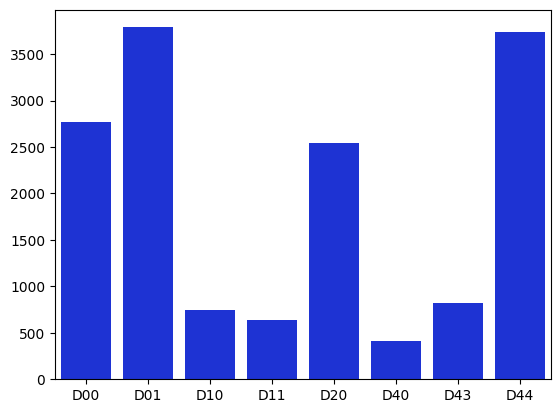

In [15]:
# 每个分类标签的数量
import collections
count_dict = collections.Counter(cls_names)
cls_count = []
for damageType in damageTypes:
    print(str(damageType) + ' : ' + str(count_dict[damageType]))
    cls_count.append(count_dict[damageType])
    
sns.set_palette("winter", 8)
sns.barplot(x=damageTypes, y=cls_count)

In [16]:
# 每个城市的每个类别标签的数量
for gov in govs:
    cls_names = []
    total_images = 0
    file_list = [filename for filename in os.listdir(base_path + gov + '/Annotations/') if not filename.startswith('.')]

    for file in file_list:

        total_images = total_images + 1
        if file =='.DS_Store':
            pass
        else:
            infile_xml = open(base_path + gov + '/Annotations/' +file)
            tree = ElementTree.parse(infile_xml)
            root = tree.getroot()
            for obj in root.iter('object'):
                cls_name = obj.find('name').text
                cls_names.append(cls_name)
    print(gov)
    print("# of images：" + str(total_images))
    print("# of labels：" + str(len(cls_names)))
    
    count_dict = collections.Counter(cls_names)
    cls_count = []
    for damageType in damageTypes:
        print(str(damageType) + ' : ' + str(count_dict[damageType]))
        cls_count.append(count_dict[damageType])
        
    print('**************************************************')

Adachi
# of images：1650
# of labels：2924
D00 : 529
D01 : 1013
D10 : 153
D11 : 279
D20 : 172
D40 : 11
D43 : 191
D44 : 567
**************************************************
Chiba
# of images：467
# of labels：797
D00 : 183
D01 : 187
D10 : 13
D11 : 12
D20 : 27
D40 : 3
D43 : 104
D44 : 267
**************************************************
Ichihara
# of images：254
# of labels：482
D00 : 175
D01 : 71
D10 : 18
D11 : 9
D20 : 43
D40 : 8
D43 : 20
D44 : 138
**************************************************
Muroran
# of images：2145
# of labels：3601
D00 : 671
D01 : 574
D10 : 124
D11 : 88
D20 : 1192
D40 : 189
D43 : 50
D44 : 712
**************************************************
Nagakute
# of images：1366
# of labels：2302
D00 : 482
D01 : 477
D10 : 169
D11 : 58
D20 : 351
D40 : 14
D43 : 90
D44 : 659
**************************************************
Numazu
# of images：2032
# of labels：3711
D00 : 560
D01 : 807
D10 : 245
D11 : 129
D20 : 735
D40 : 165
D43 : 161
D44 : 908
************************************

# 检查数据集里的一些图片

In [17]:
import cv2
import random

In [18]:
def draw_images(image_file):
    gov = image_file.split('_')[0]
    img = cv2.imread(base_path + gov + '/JPEGImages/' + image_file.split('.')[0] + '.jpg')
    
    infile_xml = open(base_path + gov + '/Annotations/' +image_file)
    tree = ElementTree.parse(infile_xml)
    root = tree.getroot()
    
    for obj in root.iter('object'):
        cls_name = obj.find('name').text
        xmlbox = obj.find('bndbox')
        xmin = int(xmlbox.find('xmin').text)
        xmax = int(xmlbox.find('xmax').text)
        ymin = int(xmlbox.find('ymin').text)
        ymax = int(xmlbox.find('ymax').text)

        font = cv2.FONT_HERSHEY_SIMPLEX

        # put text
        cv2.putText(img,cls_name,(xmin,ymin-10),font,1,(0,255,0),2,cv2.LINE_AA)

        # draw bounding box
        cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (0,255,0),3)
    return img

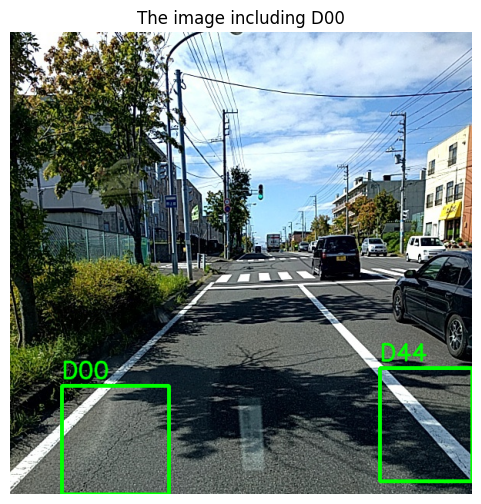

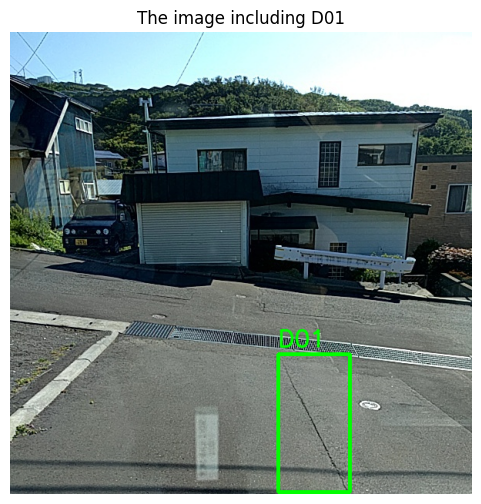

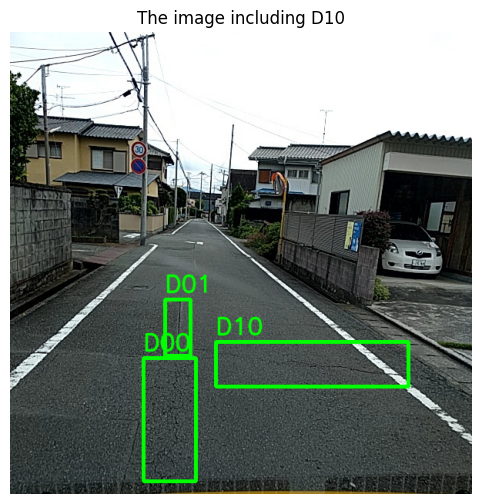

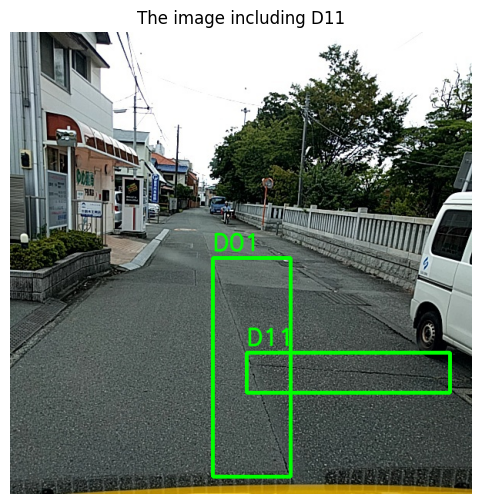

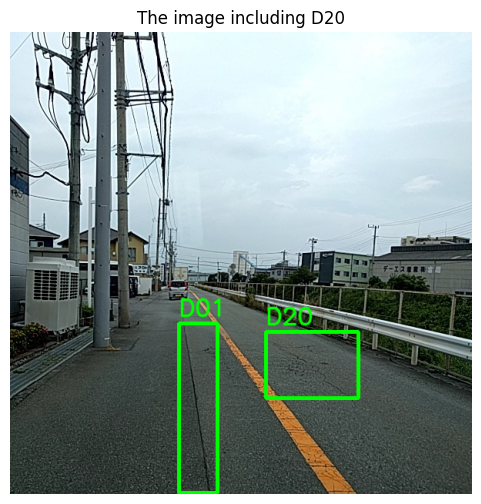

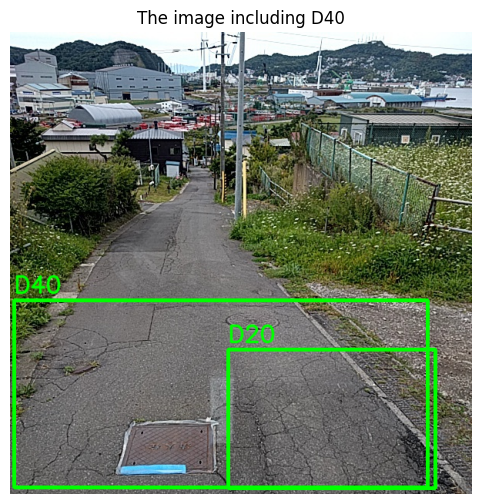

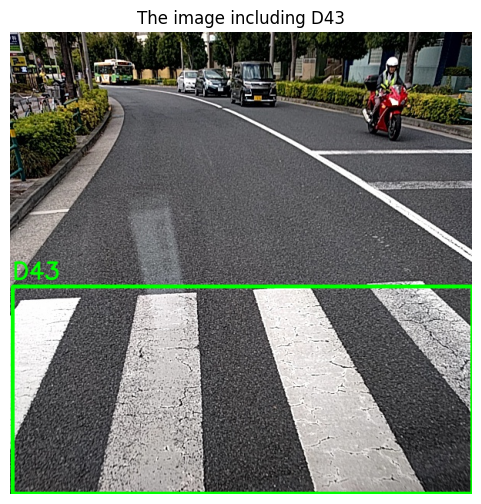

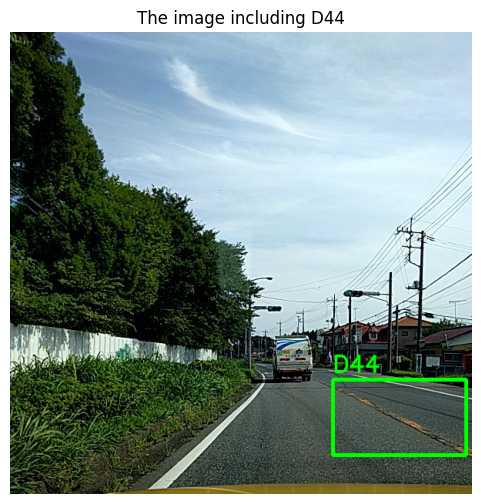

In [23]:
for damageType in damageTypes:
    tmp = []
    for gov in govs:
        file = open(base_path + gov + '/ImageSets/Main/%s_trainval.txt' %damageType, 'r')

        for line in file:
            line = line.rstrip('\n').split('/')[-1]

            if line.split(' ')[2] == '1':
                tmp.append(line.split(' ')[0]+'.xml')
        
        
    random.shuffle(tmp)
    fig = plt.figure(figsize=(6,6))
    for number, image in enumerate(tmp[0:1]):
        img = draw_images(image)
        plt.subplot(1, 1, number + 1)
        plt.axis('off')
        plt.title('The image including ' + damageType)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# 接下来，使用SSD_mobilenet进行道路损坏检测

# 导入

In [24]:
import numpy as np
import sys
import tarfile
import tensorflow as tf
import zipfile

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

if tf.__version__ != '1.4.1':
  raise ImportError('Please upgrade your tensorflow installation to v1.4.1!')

ModuleNotFoundError: No module named 'tensorflow'